### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from re import T
import random

# import yfinance as yf
from scipy.stats import norm
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

### Read Dataset

In [2]:
#For example, on this code using the dummy data with numpy
arr_random = np.random.default_rng().uniform(low= 5,high=100, size=[50000, 1])

In [3]:
df = pd.DataFrame(arr_random, columns=["Data"])

In [4]:
df

,Data
0,50.502183
1,75.791651
2,13.997659
3,86.811448
4,76.033749
...,...
49995,11.520507
49996,58.426807
49997,11.421073
49998,36.625490


### Reshape and scale data

In [11]:
returns = df['Data'].values.reshape(-1, 1)
scaler = MinMaxScaler()
returns = scaler.fit_transform(returns)

### ANN Architecture



In [12]:
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(BatchNormalization())

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='linear'))

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 162,817 (636.00 KB)

 Trainable params: 160,833 (628.25 KB)

 Non-trainable params: 1,984 (7.75 KB)

#### Train Model

In [13]:
# Compile model
optimizer = Adam(learning_rate=10e-3)
model.compile(loss='mse', optimizer=optimizer)

history = model.fit(returns, returns,
                    epochs=10,
                    batch_size=128,
                    verbose=1)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.3105
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0117
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0097
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0093
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0087
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0080
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0081
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0074
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0072
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0066


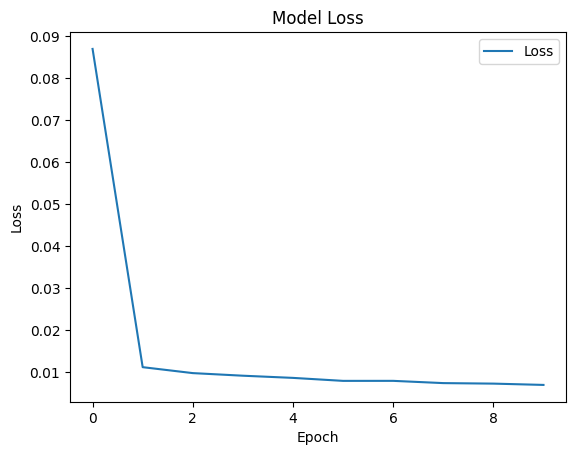

In [14]:
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Save Model

In [15]:
model.save('myModel.h5')

### Simulation with Monte Carlo

In [16]:
num_simulations = 100000
time_horizon = 3 * 12  # 3 years in months

random_inputs = np.random.normal(0, 1, (time_horizon, num_simulations))

simulated_returns = np.zeros((time_horizon, num_simulations))

for t in range(time_horizon):
    simulated_returns[t] = scaler.inverse_transform(
        model.predict(random_inputs[t].reshape(-1, 1))).flatten()

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
3125/3125 

In [17]:
# Summarize results for each year
years = np.arange(1, 4)
yearly_means = np.zeros(3)
yearly_medians = np.zeros(3)
yearly_std_devs = np.zeros(3)
yearly_percentiles_0 = np.zeros(3)
yearly_percentiles_33_333 = np.zeros(3)
yearly_percentiles_66_666 = np.zeros(3)
yearly_min = np.zeros(3)
yearly_max = np.zeros(3)
yearly_percentiles_100 = np.zeros(3)

for year in range(3):
    year_data = simulated_returns[year*12:(year+1)*12].flatten()
    yearly_means[year] = np.mean(year_data)
    yearly_medians[year] = np.median(year_data)
    yearly_std_devs[year] = np.std(year_data)
    yearly_percentiles_0[year] = np.percentile(year_data, 0)
    yearly_percentiles_33_333[year] = np.percentile(year_data, 33.333)

    yearly_percentiles_66_666[year] = np.percentile(year_data, 66.666)
    yearly_min[year] = np.min(year_data)
    yearly_max[year] = np.max(year_data)
    yearly_percentiles_100[year] = np.percentile(year_data, 100)

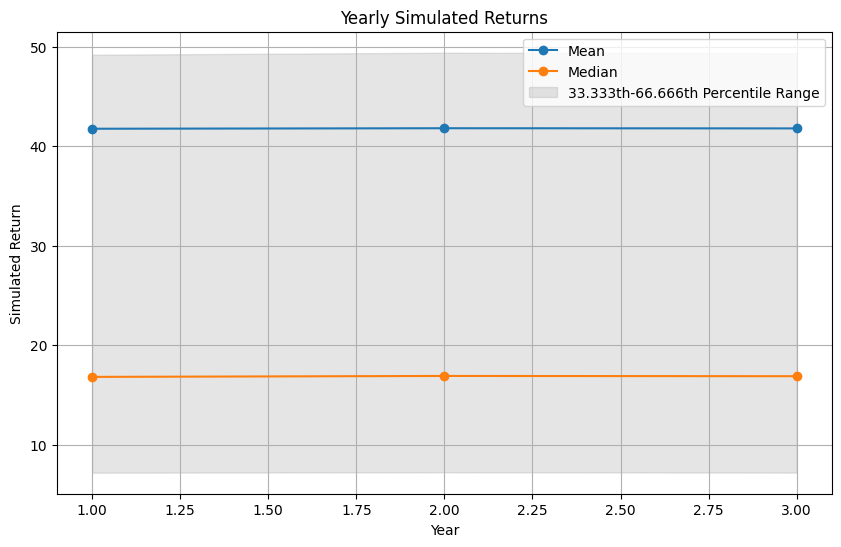

In [18]:
# Plot yearly summary statistics
plt.figure(figsize=(10, 6))
plt.plot(years, yearly_means, label='Mean', marker='o')
plt.plot(years, yearly_medians, label='Median', marker='o')
plt.fill_between(years, yearly_percentiles_33_333, yearly_percentiles_66_666, color='gray', alpha=0.2, label='33.333th-66.666th Percentile Range')
plt.title('Yearly Simulated Returns')
plt.xlabel('Year')
plt.ylabel('Simulated Return')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Create DataFrame to display yearly summary statistics
summary_data = {
    "Year": years,
    "Mean": yearly_means,
    "Median": yearly_medians,
    "Std Dev": yearly_std_devs,
    "0th Percentile (Min)": yearly_percentiles_0,
    "33.333th Percentile": yearly_percentiles_33_333,
    "66.666th Percentile": yearly_percentiles_66_666,
    "Max (100th Percentile)": yearly_max
}
summary_df = pd.DataFrame(summary_data)
print(summary_df)

   Year       Mean     Median    Std Dev  0th Percentile (Min)  \
0     1  41.755537  16.809688  48.969566              2.541074   
1     2  41.807101  16.904902  48.945659              2.541068   
2     3  41.790267  16.878162  48.984477              2.541074   

   33.333th Percentile  66.666th Percentile  Max (100th Percentile)  
0             7.176458            49.198037              435.801361  
1             7.217542            49.397785              419.444977  
2             7.184802            49.345379              410.521271  


In [20]:
# Calculate averages of the min, 0th percentile, 33.333th percentile, 66.666th percentile, and max
avg_min = np.mean(yearly_min)
avg_33_333 = np.mean(yearly_percentiles_33_333)
avg_66_666 = np.mean(yearly_percentiles_66_666)
avg_max = np.mean(yearly_max)

# Print the averages
print(f"Average Min (0th Percentile): {avg_min}")
print(f"Average 33.333th Percentile: {avg_33_333}")
print(f"Average 66.666th Percentile: {avg_66_666}")
print(f"Average Max (100th Percentile): {avg_max}")

Average Min (0th Percentile): 2.541072130203247
Average 33.333th Percentile: 7.192933930473326
Average 66.666th Percentile: 49.31373384318033
Average Max (100th Percentile): 421.9225362141927


####  Histogram

In [21]:
simulated_returns = simulated_returns.flatten()

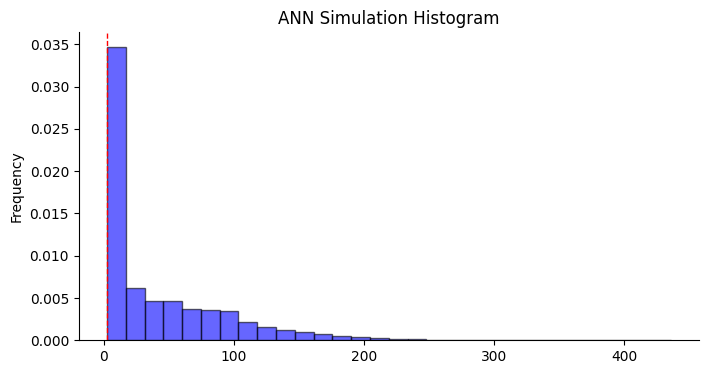

In [22]:
plt.figure(figsize=(8, 4))
plt.hist(simulated_returns, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.axvline(x=avg_min, color='r', linestyle='dashed', linewidth=1)
plt.title('ANN Simulation Histogram')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()
